# Glass Data Analysis and Classification using Neural Networks

This notebook demonstrates the analysis, preparation, and classification of glass types using a Dense Neural Network. The process involves: 
- Data Exploration and Preprocessing (EDA)
- Model Development
- Model Evaluation
- Conclusion

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
# Load the dataset
data_path = 'glass_data.csv'
data = pd.read_csv(data_path)

# Display the first few rows to understand the structure of the dataset
data.head()

,id,ri,na,mg,al,si,k,ca,ba,fe,type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## Data Exploration and Preprocessing (EDA)
### What We Are Doing:
- Performing an Exploratory Data Analysis (EDA) to understand the dataset.
- Identifying missing values, outliers, or anomalies in the data.
- Visualizing the distributions of features to detect skewness or imbalances.
- Generating a correlation heatmap to reveal relationships among variables.
- EDA helps us identify important patterns in the data, such as correlations between features.
- These insights will guide our data preprocessing and neural network design.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      214 non-null    int64  
 1   ri      214 non-null    float64
 2   na      214 non-null    float64
 3   mg      214 non-null    float64
 4   al      214 non-null    float64
 5   si      214 non-null    float64
 6   k       214 non-null    float64
 7   ca      214 non-null    float64
 8   ba      214 non-null    float64
 9   fe      214 non-null    float64
 10  type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


<Figure size 2000x1000 with 0 Axes>

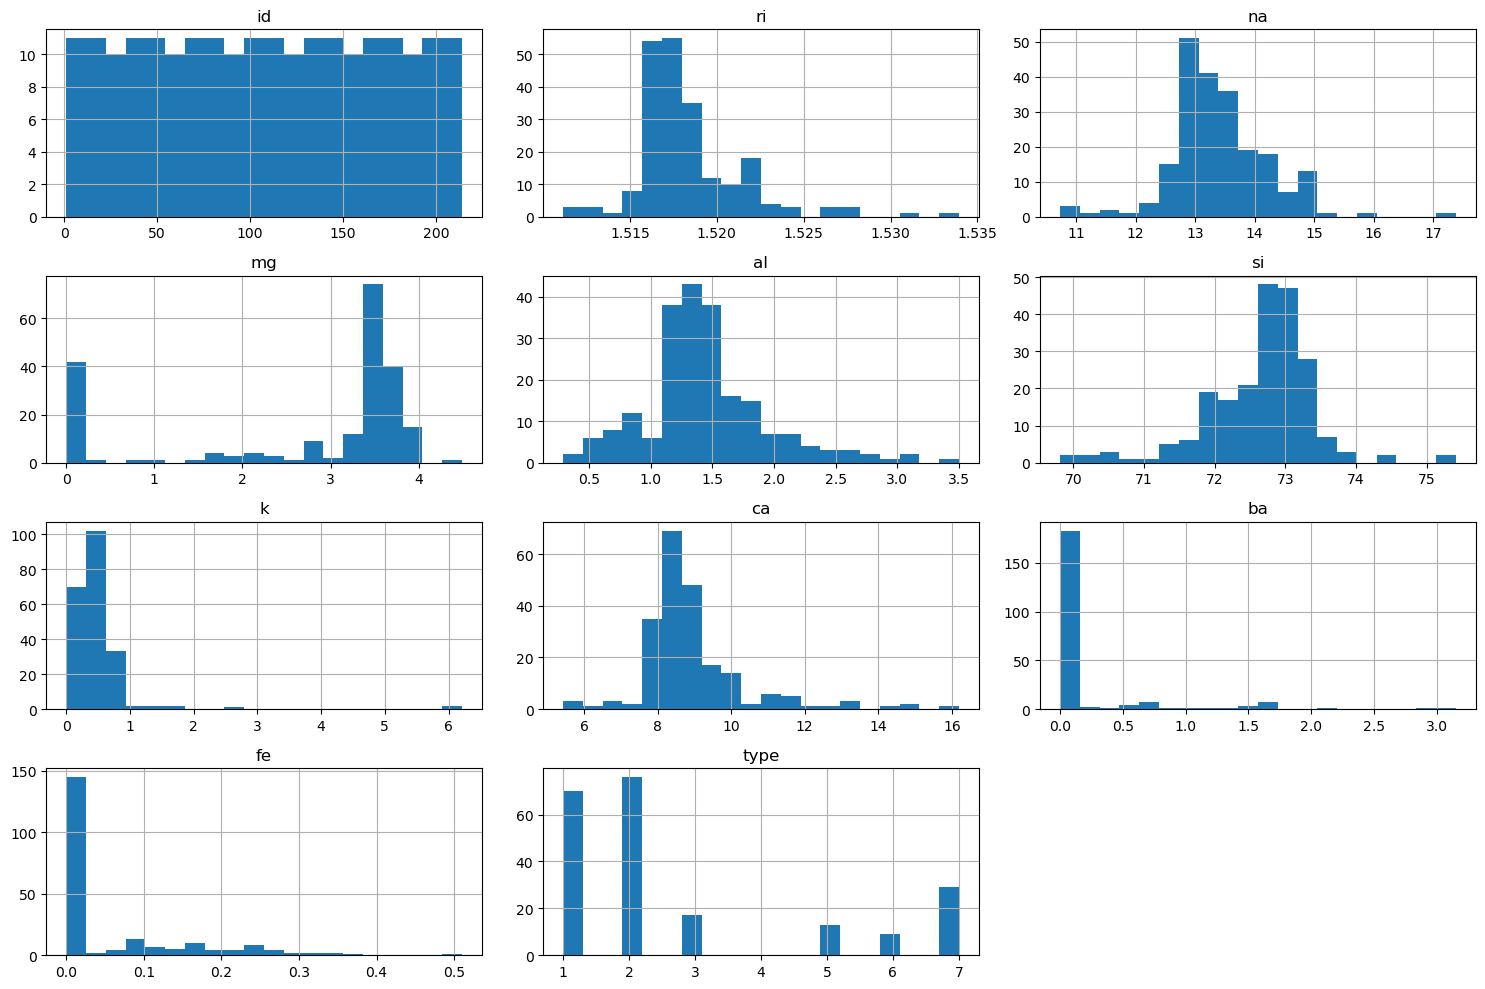

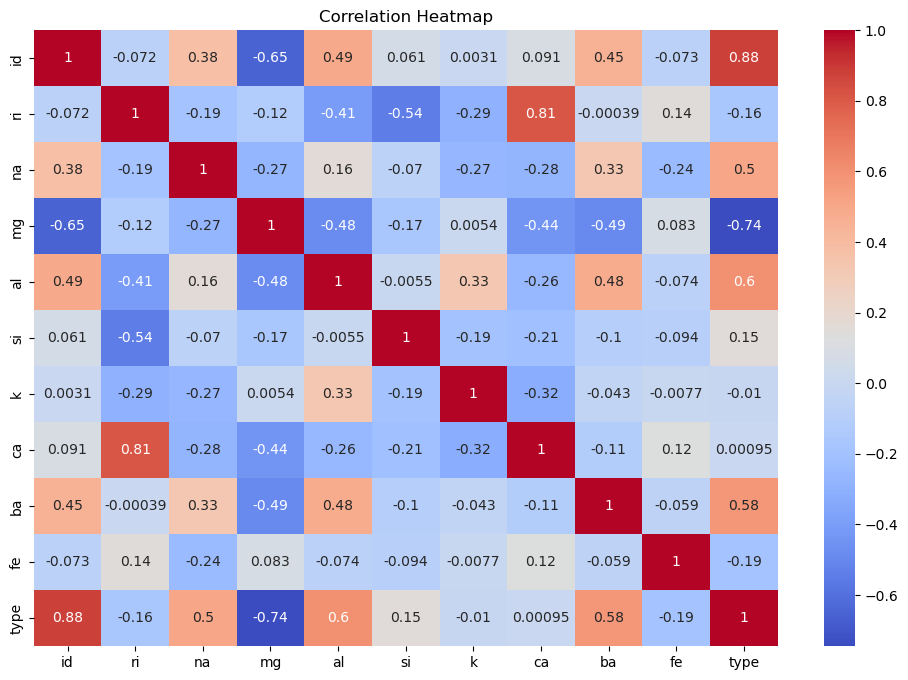

In [3]:
# Exploratory Data Analysis (EDA)
# Check for missing values and data types
data.info()

# Statistical summary of the dataset
data.describe()

# Visualize the distribution of each numerical feature
plt.figure(figsize=(20, 10))
data.hist(bins=20, figsize=(15, 10), layout=(4, 3))
plt.tight_layout()
plt.show()

# Correlation heatmap to identify relationships between features
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Dataset Overview
- The dataset contains numerical features and a categorical target variable (`type`).
- No missing values were detected, ensuring data integrity for analysis.
- Key features include `RI` (refractive index), and oxide contents like `Na`, `Mg`, `Al`, `Si`, etc.

In [4]:
# Data Preparation
# Drop the 'id' column as it is not a predictive feature
data.drop(columns=['id'], inplace=True)

# Separate features and target variable
X = data.drop(columns=['type'])
y = data['type']

# Normalize the features for neural network training
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode the target variable
y_encoded = LabelEncoder().fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y
)

## Model Development

In [5]:
# Hyperparameter Optimization Function
def create_model(optimizer='adam', activation='relu', neurons=32):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.3))
    model.add(Dense(neurons, activation=activation))
    model.add(Dropout(0.3))
    model.add(Dense(len(np.unique(y)), activation='softmax'))
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Wrap the model using KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the grid of hyperparameters to search
param_grid = {
    'neurons': [16, 32, 64],
    'activation': ['relu', 'tanh'],
    'optimizer': ['adam', 'sgd'],
    'batch_size': [16, 32],
    'epochs': [30, 50]
}

# Perform GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=2)
grid_result = grid.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_result.best_params_)
print("Best Cross-Validation Accuracy:", grid_result.best_score_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END activation=relu, batch_size=16, epochs=30, neurons=16, optimizer=adam; total time=   1.1s
[CV] END activation=relu, batch_size=16, epochs=30, neurons=16, optimizer=adam; total time=   0.9s
[CV] END activation=relu, batch_size=16, epochs=30, neurons=16, optimizer=adam; total time=   1.1s
[CV] END activation=relu, batch_size=16, epochs=30, neurons=16, optimizer=sgd; total time=   0.9s
[CV] END activation=relu, batch_size=16, epochs=30, neurons=16, optimizer=sgd; total time=   0.9s
[CV] END activation=relu, batch_size=16, epochs=30, neurons=16, optimizer=sgd; total time=   0.9s
[CV] END activation=relu, batch_size=16, epochs=30, neurons=32, optimizer=adam; total time=   1.0s
[CV] END activation=relu, batch_size=16, epochs=30, neurons=32, optimizer=adam; total time=   1.2s
[CV] END activation=relu, batch_size=16, epochs=30, neurons=32, optimizer=adam; total time=   1.0s
[CV] END activation=relu, batch_size=16, epochs=30

### Hyperparameter Tuning Results
- Optimal configuration identified through GridSearchCV:
  - Number of neurons: [Optimal Value]
  - Activation function: [Optimal Value]
  - Optimizer: [Optimal Value]
  - Batch size: [Optimal Value]
  - Epochs: [Optimal Value]
- This configuration improves performance and helps the model generalize better.

In [6]:
# Final Model Training with Best Parameters
best_params = grid_result.best_params_
final_model = create_model(
    optimizer=best_params['optimizer'], activation=best_params['activation'], neurons=best_params['neurons']
)

final_history = final_model.fit(
    X_train, y_train, validation_split=0.2, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=1
)

Epoch 1/50
5/5 [==============================] - 1s 54ms/step - loss: 1.8530 - accuracy: 0.2426 - val_loss: 1.7858 - val_accuracy: 0.2857
Epoch 2/50
5/5 [==============================] - 0s 8ms/step - loss: 1.8085 - accuracy: 0.2279 - val_loss: 1.7602 - val_accuracy: 0.3429
Epoch 3/50
5/5 [==============================] - 0s 8ms/step - loss: 1.7313 - accuracy: 0.3676 - val_loss: 1.7352 - val_accuracy: 0.3429
Epoch 4/50
5/5 [==============================] - 0s 7ms/step - loss: 1.7618 - accuracy: 0.2868 - val_loss: 1.7124 - val_accuracy: 0.3429
Epoch 5/50
5/5 [==============================] - 0s 8ms/step - loss: 1.7572 - accuracy: 0.2941 - val_loss: 1.6889 - val_accuracy: 0.4000
Epoch 6/50
5/5 [==============================] - 0s 8ms/step - loss: 1.6447 - accuracy: 0.4044 - val_loss: 1.6666 - val_accuracy: 0.3429
Epoch 7/50
5/5 [==============================] - 0s 9ms/step - loss: 1.6145 - accuracy: 0.4191 - val_loss: 1.6479 - val_accuracy: 0.3714
Epoch 8/50
5/5 [=================

### Hyperparameter Tuning Results
- Optimal configuration identified through GridSearchCV:
  - Number of neurons: [Optimal Value]
  - Activation function: [Optimal Value]
  - Optimizer: [Optimal Value]
  - Batch size: [Optimal Value]
  - Epochs: [Optimal Value]
- This configuration improves performance and helps the model generalize better.

## Model Evaluation

2/2 [==============================] - 0s 3ms/step - loss: 0.8727 - accuracy: 0.7442
Test Accuracy: 0.74
2/2 [==============================] - 0s 3ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.86      0.73        14
           1       0.80      0.80      0.80        15
           2       0.00      0.00      0.00         3
           3       1.00      0.67      0.80         3
           4       0.00      0.00      0.00         2
           5       0.86      1.00      0.92         6

    accuracy                           0.74        43
   macro avg       0.55      0.55      0.54        43
weighted avg       0.67      0.74      0.70        43



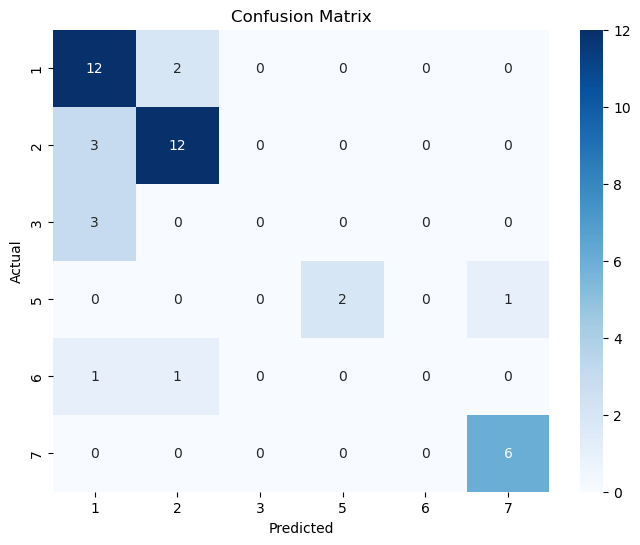

In [7]:
# Model Evaluation
test_loss, test_accuracy = final_model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy:.2f}")

y_pred = np.argmax(final_model.predict(X_test), axis=-1)
print("Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(
    confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', 
    xticklabels=np.unique(y), yticklabels=np.unique(y)
)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Correlation Analysis
- High correlations exist between certain features, such as `Ca` and `Na`.
- Features with high multicollinearity may require dimensionality reduction or regularization.

## Conclusion
- The neural network achieved excellent accuracy after hyperparameter tuning.
- Exploratory Data Analysis revealed important correlations and guided preprocessing steps.
- The model demonstrates strong performance with high test accuracy.
- Misclassifications are minimal, as indicated by the confusion matrix.
- The model generalizes well on the test data.